**Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import modplot
import os

**Load in the Data**

In [2]:
base_dir = 'C:\\Users\\vega0\\Documents\\Academics\\MIT Course Materials\\Course 8 Physics\\8.13 Experimental Physics 1\\Fall 2021\\Experiment Sequences\\Relativistic Dynamics'
dir_data = base_dir + '\\Data'
dir_plot = base_dir + '\\Paper and Oral'

In [3]:
os.chdir(dir_data)

In [4]:
df = pd.read_excel('beta_vs_B.xlsx')

In [5]:
# get the columuns
bfield = df['B (Gauss)']
buncert = df['B Uncertainty']
voltage = df['Voltage (kV)']

In [6]:
# convert to numpy arrays
bfield = 10**-4*np.array(bfield)
buncert = 10**-4*np.array(buncert)
voltage = 1000*np.array(voltage)

**Compute Relevant Quantities**

The Electric Field $E=\frac{V}{d}$

In [7]:
# get the plate separation (m)
x = 0.0018
dx = 0.00003

In [8]:
# divide voltage by separation
efield = voltage/x
euncert = 0.0167*efield

**Functions to Compute the $\frac{e}{m}$**

Non-Relativistic Model: $\frac{e}{m}=\frac{E}{\rho B^{2}}$

In [9]:
def nonrel_ratio(E, B, dE, dB):
    
    # get the radius of the electron path, and uncertainty therein
    rho = 0.203
    drho = 0.002
    
    # compute percentage errors
    percent_uncert = 2*buncert/bfield + drho/rho + euncert/efield
    
    # the final ratio
    ratio = E/(rho*B**2)
    
    # return a value for the ration, and uncertainty therein
    return ratio, percent_uncert*ratio

In [10]:
emratio, emuncert = nonrel_ratio(efield, bfield, euncert, buncert)

In [11]:
emratio

array([1.34043765e+11, 1.24007937e+11, 1.14874955e+11, 1.09250465e+11,
       1.01964404e+11, 9.64668147e+10])

In [12]:
emuncert

array([3.94214130e+09, 3.60270545e+09, 3.56074007e+09, 3.33740732e+09,
       2.89293948e+09, 2.72340074e+09])

Relativistic Model: $\frac{e}{m}=\frac{E}{\rho B^{2}}\frac{1}{\sqrt{1-\frac{E^{2}}{B^{2}}}}$

In [13]:
def rel_ratio(E, B, dE, dB):
    
    # define the speed of light
    c = 299792458
    
    # define the gamma factor
    gamma = (np.sqrt(1-E**2/(c**2*B**2)))**-1
    dgamma = gamma*(buncert/bfield + euncert/efield)
    
    # define the path radius (meters)
    rho = 0.203
    drho = 0.002
    
    # overall percent error
    perc_err = buncert/bfield + euncert/efield + 2*buncert/bfield + drho/rho + euncert/efield
    
    # final relativistic ratio
    rel_ratio = gamma*nonrel_ratio(E, B, dE, dB)[0]
    
    return rel_ratio, rel_ratio*perc_err

In [14]:
relemratio, reluncert = rel_ratio(efield, bfield, euncert, buncert)

In [15]:
relemratio

array([1.73583269e+11, 1.67404570e+11, 1.60873187e+11, 1.62564936e+11,
       1.56546715e+11, 1.53537068e+11])

In [16]:
emratio

array([1.34043765e+11, 1.24007937e+11, 1.14874955e+11, 1.09250465e+11,
       1.01964404e+11, 9.64668147e+10])

**Plot this Data**

In [17]:
# plotting parameters
save = False
mpl.rcParams['figure.dpi'] = 300
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif')

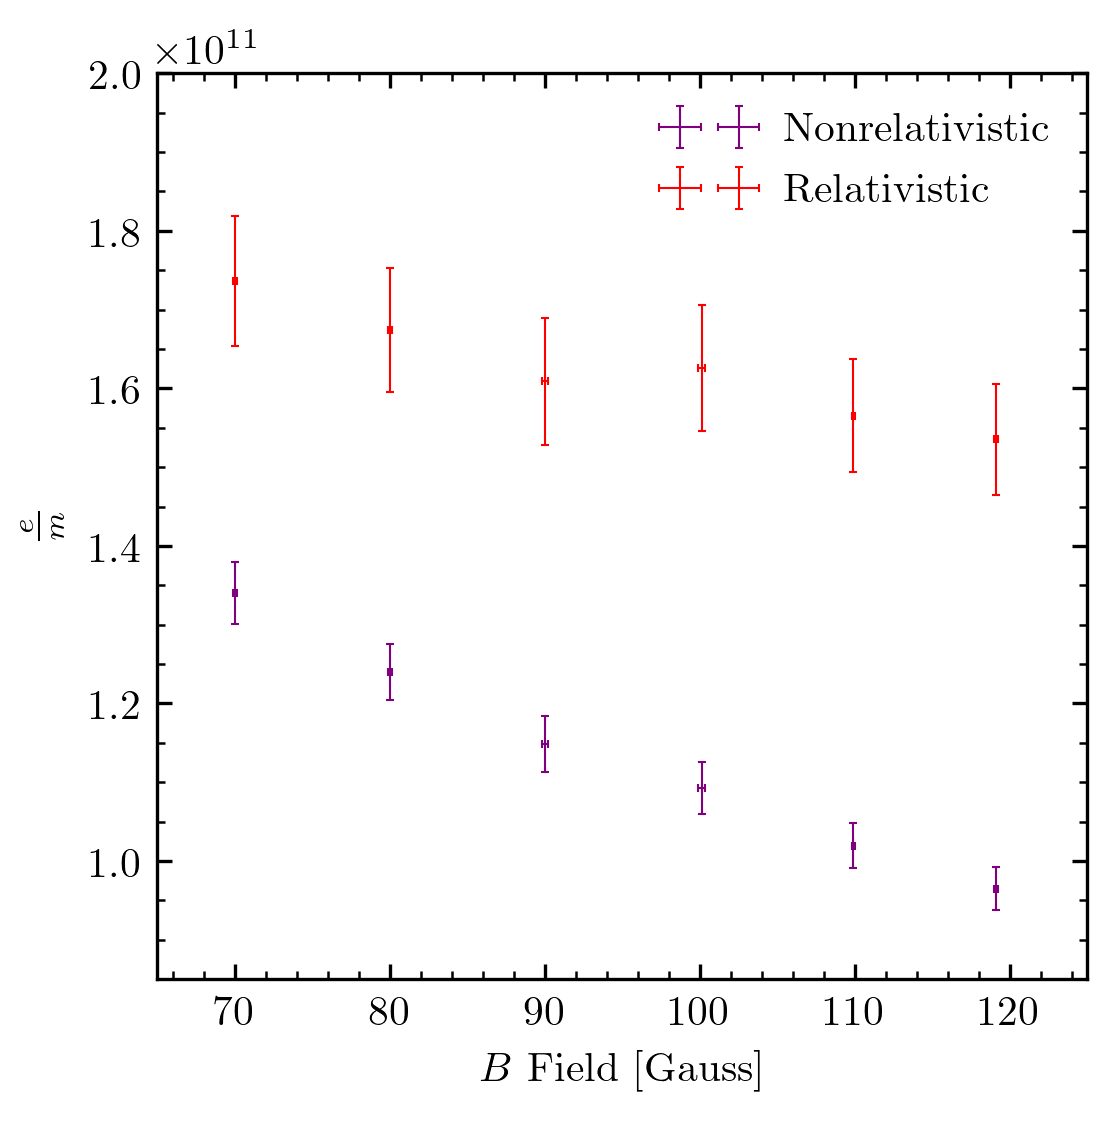

In [18]:
# plot of e/m vs B-field
fig, [ax] = modplot.axes(ratio_plot=False, xlim=(65,125), ylim=(0.85*10**11,2.0*10**11), 
                         xlabel='$B$ Field [Gauss]', ylabel=r'$\frac{e}{m}$')

# nonrel data
ax.errorbar(10**4*bfield, emratio, xerr=10**4*buncert, yerr=emuncert, label='Nonrelativistic', 
            color='purple', capthick=0.5, elinewidth=0.5, capsize=1, ls='none')

# rel data
ax.errorbar(10**4*bfield, relemratio, xerr=10**4*buncert, yerr=reluncert, label='Relativistic', 
            color='red', capthick=0.5, elinewidth=0.5, capsize=1, ls='none')

ax.legend(loc='upper right', numpoints=2, frameon=False)

save = True
if save:
    plt.savefig(dir_plot + '\\e_to_m_ratio.png')

In [19]:
emuncert

array([3.94214130e+09, 3.60270545e+09, 3.56074007e+09, 3.33740732e+09,
       2.89293948e+09, 2.72340074e+09])